# ***Proyecto: Coloreo de Grafos***



In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#*Simulated Annealing*

Primero desarrollaremos la funcion objetivo para el ***Problema del Coloreo*** $(PC)$. La idea de la optimización es minimizar la funcion $H(x)$, la cual esta definida como:

$H(x) = \sum_{e, f ∈ E}{1_{x_e = x_f}}$

La función suma $1$ cada vez que encuentra una arista entre nodos con el mismo color.

Con esto, minimizar la función $H(x)$ corresponde a minimizar la cantidad de aristas que unen nodos con igual color, en consecuencia, hacer que cada nodo tengo un color diferente al de sus vecinos.

Si al minimizar la función se cumple que $H(x) = 0$, entonces el $PC$ tiene solución, mientras que si $H(x) \neq 0$, existira al menos una arista que une dos nodos con el mismo color. Por lo que no es posible resolver el problema con los parametros dados.

In [ ]:
#La función recibe un grafo "G" y un diccionario "colores", y devuelve la
# cantidad de aristas problematicas, es decir, la cantidad de aristas que
#unen dos nodos con el mismo color
def H(G, colores):
  problemas = 0
  for e in G.edges():
    if colores[e[0]] == colores[e[1]]:
      problemas += 1
    else:
      pass
  return problemas


*   **Parametros**
  
  Generaremos un grafo $G = (V, E)$ de manera aleatoria, con $n$ nodos y aristas $e$ con probabilidad $p$. Además para el coloreo, aceptaremos $C$ colores

In [ ]:
#Parametros

n = 200 #Número de nodos del grafo
p = 0.3 #Probabilidad de la arista
G = nx.erdos_renyi_graph(n, p)  #Grafo aleatorio de n nodos
C = 4 #Colores que tendrá el grafo



*   **Asignación de colores**
  
  Queremos asignar un color cualquiera a cada nodo, para esto, le asignaremos un valor entero de forma aleatoria entre $[1, C]$ y luego asociaremos cada valor a un color diferente. Para esto usaremos un diccionario donde la llave representa el nodo y el valor, el color (número) asignado

In [ ]:
#Asignamos un valor a cada nodo
def colores_iniciales(G, C):
    return {nodo : np.random.randint(1, C + 1) for nodo in G.nodes} #Le asignamos un valor a cada nodo
color = colores_iniciales(G, C)
#print(color) #Diccionario con los nodos y su respectivo valor

#Asignamos un color a cada nodo segun su valor y generamos el grafo
#Descomentar lo de abajo para ver el grafo inicial, no lo puse para ver porque igual no se entiende nada, son muchos nodos
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_color=list(color.values()), cmap=plt.cm.rainbow) # Le asignamos un color a cada nodo
#plt.title("Inicial")
#plt.show()

print("El grafo tiene " + str(H(G, color)) + " aristas problematicas")

El grafo tiene 1432 aristas problematicas




*   **Construccion del algoritmo**

  Programamos la funcion 'Annealing', la cual será nuestro algoritmo. La función recibira como parametros un grafo $G$, la cantidad maxima de colores $C$, la "temperatura" inicial $T$, la tasa de convergencia $b$ y el número de iteraciones $N$
  
  La interpretacion de $T$ y $b$ corresponde a que la temperatura representa la probabilidad de aceptar peores soluciones durante las primeras iteraciones, mientras mayor es la temperatura, mayor es la probabilidad de aceptar soluciones malas. Por otro lado, la tasa de convergencia regula la velocidad con la que $T$ disminuye a lo largo de las iteraciones. Si la tasa $b$ es alta, $T$ disminuirá rápido, lo que permitirá que con cada iteración se acerque más a la solución óptima



In [ ]:
def Annealing(G, C, T_inicial, b, N):
    coloreo_actual = colores_iniciales(G, C) #Iniciamos con el coloreo actual del grafo
    costo_actual = H(G, coloreo_actual) #Guardamos el costo actual del grafo, es decir, el valor de H(x)
    coloreo_nuevo = coloreo_actual
    costo_nuevo = costo_actual
    T = T_inicial
    for i in range(N):
      cambio_nodo = np.random.choice(list(coloreo_actual.keys())) #Elegimos el nodo a cambiar
      color_vecino = coloreo_actual.copy() #hacemos una copia para no cambiar directamente el diccionario original
      color_vecino[cambio_nodo] = np.random.randint(1, C + 1) #Asignamos un nuevo color (número) al nodo de forma aleatoria
      costo_vecino = H(G, color_vecino) #Evaluamos el coste con el nuevo color
      if costo_vecino < costo_actual or np.random.uniform(0, 1) < np.exp(-(costo_actual - costo_vecino)*T):
        coloreo_actual = color_vecino
        costo_actual = costo_vecino
      if costo_actual < costo_nuevo:
        coloreo_nuevo = coloreo_actual
        costo_nuevo = costo_actual
        T *= b
    return coloreo_nuevo



*   **Comparación**

  Veamos el grafo inicial, al que se le asigno colores aleatoriamente, y el grafo final, el grafo despues de pasar por el algoritmo.



<ipython-input-22-279308a2f440>:12: RuntimeWarning: overflow encountered in exp
  if costo_vecino < costo_actual or np.random.uniform(0, 1) < np.exp(-(costo_actual - costo_vecino)*T):


{0: 4, 1: 2, 2: 1, 3: 4, 4: 4, 5: 2, 6: 1, 7: 4, 8: 1, 9: 1, 10: 2, 11: 3, 12: 3, 13: 1, 14: 2, 15: 3, 16: 4, 17: 4, 18: 4, 19: 4, 20: 2, 21: 2, 22: 2, 23: 3, 24: 2, 25: 1, 26: 1, 27: 3, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 2, 34: 2, 35: 1, 36: 4, 37: 3, 38: 1, 39: 2, 40: 1, 41: 4, 42: 4, 43: 2, 44: 1, 45: 1, 46: 3, 47: 1, 48: 4, 49: 4, 50: 2, 51: 2, 52: 3, 53: 1, 54: 1, 55: 4, 56: 3, 57: 4, 58: 4, 59: 4, 60: 3, 61: 4, 62: 4, 63: 2, 64: 1, 65: 4, 66: 3, 67: 3, 68: 3, 69: 1, 70: 4, 71: 3, 72: 3, 73: 2, 74: 1, 75: 3, 76: 3, 77: 2, 78: 4, 79: 1, 80: 2, 81: 2, 82: 2, 83: 4, 84: 1, 85: 4, 86: 4, 87: 2, 88: 1, 89: 4, 90: 4, 91: 4, 92: 1, 93: 3, 94: 2, 95: 2, 96: 4, 97: 4, 98: 4, 99: 4, 100: 1, 101: 3, 102: 1, 103: 2, 104: 4, 105: 1, 106: 3, 107: 4, 108: 1, 109: 2, 110: 1, 111: 2, 112: 4, 113: 1, 114: 1, 115: 4, 116: 1, 117: 1, 118: 1, 119: 2, 120: 4, 121: 1, 122: 1, 123: 3, 124: 2, 125: 3, 126: 3, 127: 3, 128: 3, 129: 2, 130: 1, 131: 4, 132: 1, 133: 4, 134: 2, 135: 4, 136: 3, 137: 2, 138: 

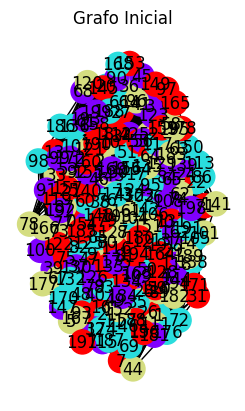

In [ ]:
T_inicial = 100
b = 0.5
N = 8*(10**5)

coloreo_final = Annealing(G, C, T_inicial, b, N)
print(coloreo_final) # El diccionario con la configura final del grafo

#Visualizamos el grafo inicial, con la distribucion aleatoria de colores
#plt.subplot(1, 2, 1)
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_color=list(color.values()), cmap=plt.cm.rainbow) # Le asignamos un color a cada nodo
#plt.title("Grafo Inicial")

#Visualizar el grafo final, despues de N iteraciones
#Descomentar lo de abajo para ver el grafo inicial, no lo puse para ver porque igual no se entiende nada, son muchos nodos
#plt.subplot(1, 2, 2)
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_color=list(coloreo_final.values()), cmap=plt.cm.rainbow)
#plt.title("Grafo Final")
#plt.show()
print("El grafo inicial tiene " + str(H(G, color)) + " aristas problematicas")
print("El grafo final tiene " + str(H(G, coloreo_final)) + " aristas problematicas")

# Comparaciones

Queremos estudiar como se comporta el algortimo con respecto a ciertos parametros. Estudiemos como se comporta el algoritmo con la cantidad de nodos del grafo, la cantidad de aristas, el valor de T ó b y como se desempeña frente a funciones predeterminadas de la libreria networkx.


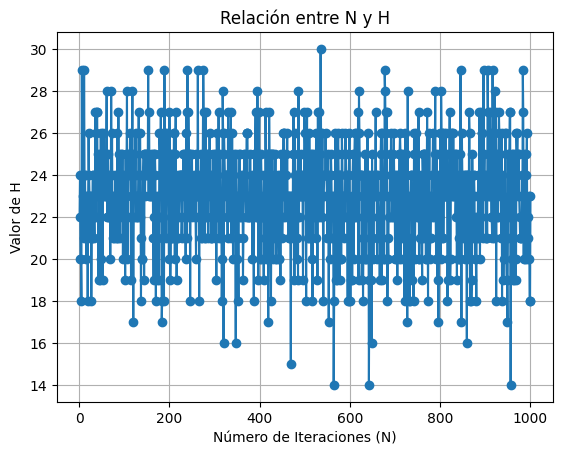

In [ ]:
# Realizar múltiples ejecuciones con diferentes valores de N
N = 1000
N_valores = list(range(1, N + 1))
H_valores = []

for n in N_valores:
  H_value = H(G, Annealing(G, C, T_inicial, b, N))
  H_valores.append(H_value)

# Graficar N vs H
plt.plot(N_valores, H_valores, marker='o')
plt.title('Relación entre N y H')
plt.xlabel('Número de Iteraciones (N)')
plt.ylabel('Valor de H')
plt.grid(True)
plt.show()


In [ ]:
n = 500
n_valores = list(range(1, n + 1))
H_valores = []

for nodos in n:
  H_value = H(G, Annealing(G, C, T_inicial, b, N))
  H_valores.append(H_valores)

# Graficar N vs H
plt.plot(T_valores, H_valores, marker='o')
plt.title('Relación entre T y H')
plt.xlabel('Temperatura (T)')
plt.ylabel('Valor de H')
plt.grid(True)
plt.show()

TypeError: ignored